# Compute Basic Statistics for Each Skill
Compute basic statistics (mean, median, mode) for each skill

In [2]:
import pandas as pd

# Load the data
csv1 =  pandas.read_csv("clean_data.csv")
data =  pandas.DataFrame(csv1)

# Print the column names to verify
#print("Column names in the DataFrame:")
#print(data.columns)


skills = ['cgpa', 'Critical Thinking', 'Problem Solving', 'Team Work', 'Communication', 'Software Engineering Principal', 'Data Structure & Algorithm', 'Database Management', 'Data Analysis skill', 'Web Developing Skill', 'Understanding of computer architecture & System', 'Understanding Operating System', 'Networking Concept', 'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill', 'Research Skill', 'publication', 'project']


statistics = {}
for skill in skills:
    if skill in data.columns:
        statistics[skill] = {
            'mean': data[skill].mean(),
            'median': data[skill].median(),
            'mode': data[skill].mode()[0] if not data[skill].mode().empty else 'No mode'  # handle empty mode
        }
    else:
        print(f"Column '{skill}' not found in the DataFrame")


data = {
    'Skill Name': [],
    'Mean': [],
    'Median': [],
    'Mode': []
}
Stat = pd.DataFrame(data)

        
        
for skill, val in statistics.items():
    Mean=val['mean']
    Median=val['median']
    Mode=val['mode']
    new_row = {'Skill Name': skill, 'Mean':Mean, 'Median': Median, 'Mode': Mode}
    
    Stat = pd.concat([Stat,pd.DataFrame([new_row])], ignore_index=True)
    #print(f"{skill}: Mean = {Mean}, Median = {Median}, Mode = {Mode}")

    
Stat

NameError: name 'pandas' is not defined

# Identify the Distribution of Preferred Jobs Among Students

In [15]:
import pandas as pd


csv1 = pd.read_csv("clean_data.csv", usecols=["Prefer Job"])
data = pd.DataFrame(csv1)


data["Prefer Job"].fillna("", inplace=True)


jobs = ['Software Development', 'ML/AI Engineer', 'Teaching', 'Cyber Security', 'Database Administration', 
        'Data Analysis', 'Abroad', 'Govt Job', 'Researcher', 'Business', 'Networking', 'Management', 
        'BCS', 'Bank Job', 'UI/UX Designing', 'Hardware Sector', 'Gaming', 'Other']


def is_job_preferred(preferred_jobs, job):
    return job in preferred_jobs


for job in jobs:
    data[job] = data['Prefer Job'].apply(lambda x: is_job_preferred(x, job))


for job in jobs:
    print(f"Students preferring '{job}':")
    print(data[data[job] == True].index.tolist())
    print("\n")
    
    


Students preferring 'Software Development':
[0, 2, 3, 4, 5, 6, 7, 11, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 32, 34, 35, 37, 38, 39, 43, 44, 47, 48, 49, 50, 53, 54, 55, 56, 58, 60, 63, 64, 66, 67, 70, 71, 73, 77, 78, 79, 80, 81, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 98, 101, 105, 106, 107, 110, 111, 113, 114, 115, 116, 117, 120, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 142, 145, 146, 148, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 163, 165, 168, 169, 170, 171, 172, 173, 175, 176, 177, 180, 182, 183, 185, 186, 187, 191, 192, 193, 194, 196, 197, 198, 199, 202, 203, 204, 205, 207, 209, 212, 213, 215, 216, 219, 220, 222, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 247, 250, 252, 253, 257, 259, 260, 262, 263]


Students preferring 'ML/AI Engineer':
[18, 19, 20, 22, 24, 27, 29, 31, 42, 52, 53, 63, 86, 89, 93, 105, 115, 117, 118, 122, 124, 129, 133, 135, 136, 161, 163, 170, 172, 175, 177, 179, 190,

In [16]:
job_counts = {job: data[job].sum() for job in jobs}


job_counts_df = pd.DataFrame(list(job_counts.items()), columns=['Job', 'Count'])
job_counts_df

,Job,Count
0,Software Development,167
1,ML/AI Engineer,44
2,Teaching,35
3,Cyber Security,41
4,Database Administration,25
5,Data Analysis,46
6,Abroad,61
7,Govt Job,42
8,Researcher,20
9,Business,22


# Plot Jobs Count

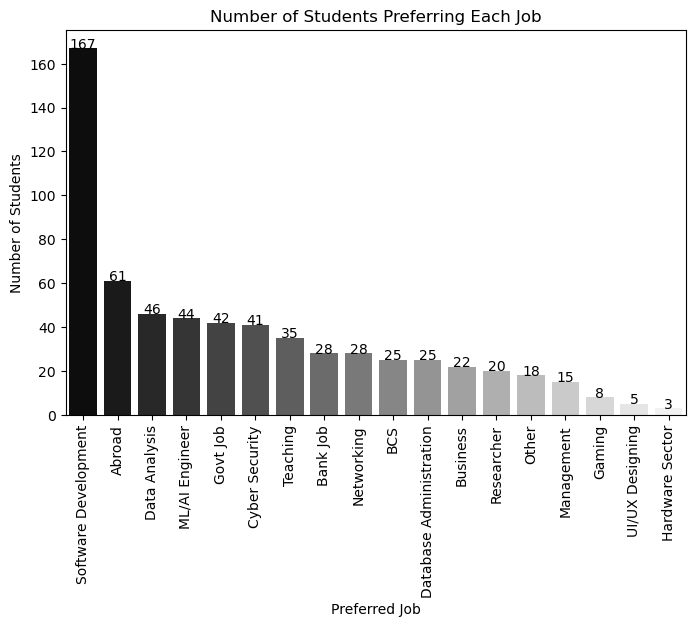

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

job_counts_df = job_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)



plt.figure(figsize=(8, 5))

ax=sns.barplot(x='Job', y='Count', data=job_counts_df, palette='gray')

#for print number on each column
for index, row in job_counts_df.iterrows():
    ax.text(index, row['Count'], row['Count'], color='black', ha="center")

plt.xticks(rotation=90)
plt.xlabel('Preferred Job')
plt.ylabel('Number of Students')
plt.title('Number of Students Preferring Each Job')
plt.show()


# prefer Job analysis with (Association Rules)

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

binary_data = data[jobs].applymap(lambda x: 1 if x else 0)

min_support = 20 / len(binary_data)

frequent_itemsets = apriori(binary_data, min_support=min_support, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules['support']=rules['support']*len(binary_data)
rules= rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
0,(ML/AI Engineer),(Software Development),35.0,0.795455,1.257485
1,(Cyber Security),(Software Development),31.0,0.756098,1.195268
2,(Database Administration),(Software Development),20.0,0.800000,1.264671
3,(Data Analysis),(Software Development),41.0,0.891304,1.409008
4,(Networking),(Software Development),21.0,0.750000,1.185629
5,(Networking),(Cyber Security),21.0,0.750000,4.829268
6,(Bank Job),(Govt Job),22.0,0.785714,4.938776
7,"(ML/AI Engineer, Abroad)",(Software Development),20.0,0.869565,1.374642


# Plot Histograms of different skills

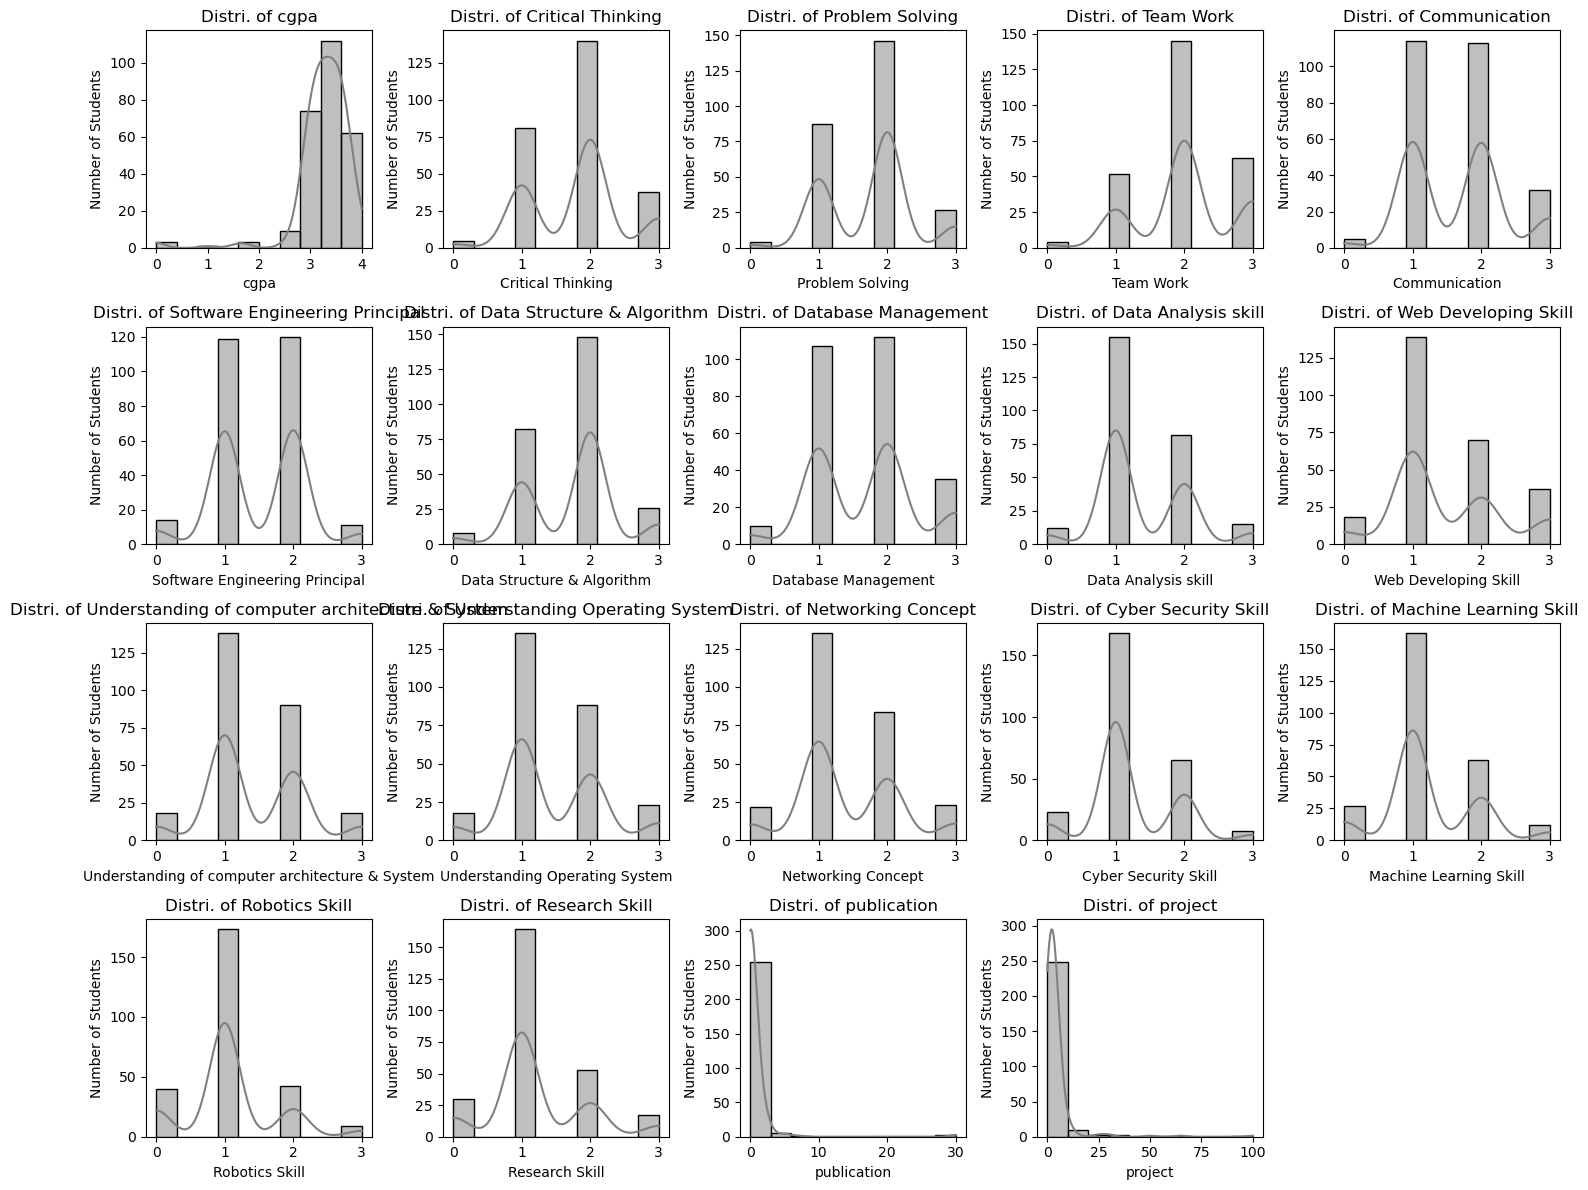

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('clean_data.csv')

# List of columns to plot
columns_to_plot = ['cgpa', 'Critical Thinking', 'Problem Solving', 
                   'Team Work','Communication', 
                   'Software Engineering Principal', 'Data Structure & Algorithm', 'Database Management', 
                   'Data Analysis skill', 'Web Developing Skill', 'Understanding of computer architecture & System', 
                   'Understanding Operating System', 'Networking Concept', 'Cyber Security Skill', 
                   'Machine Learning Skill', 'Robotics Skill', 'Research Skill', 'publication', 'project']

# Number of columns for the subplot grid
num_cols = 5
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()

# Plot each histogram in the grid
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], bins=10, kde=True, ax=axes[i], edgecolor='black',color='gray')
    axes[i].set_title(f'Distri. of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Number of Students')

# Remove any empty subplots
for j in range(i + 1, num_rows *num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



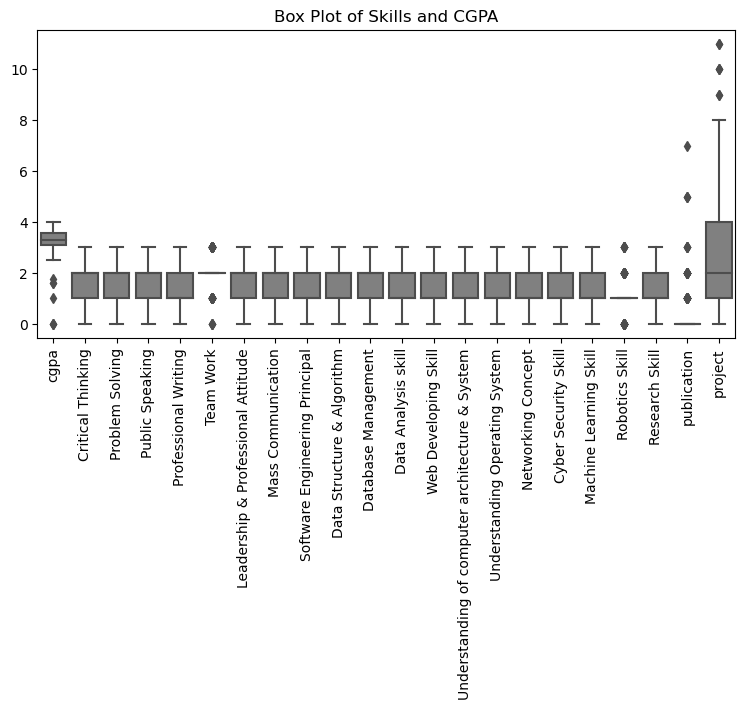

In [102]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=data[columns_to_plot],color='gray')
plt.title('Box Plot of Skills and CGPA')
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis

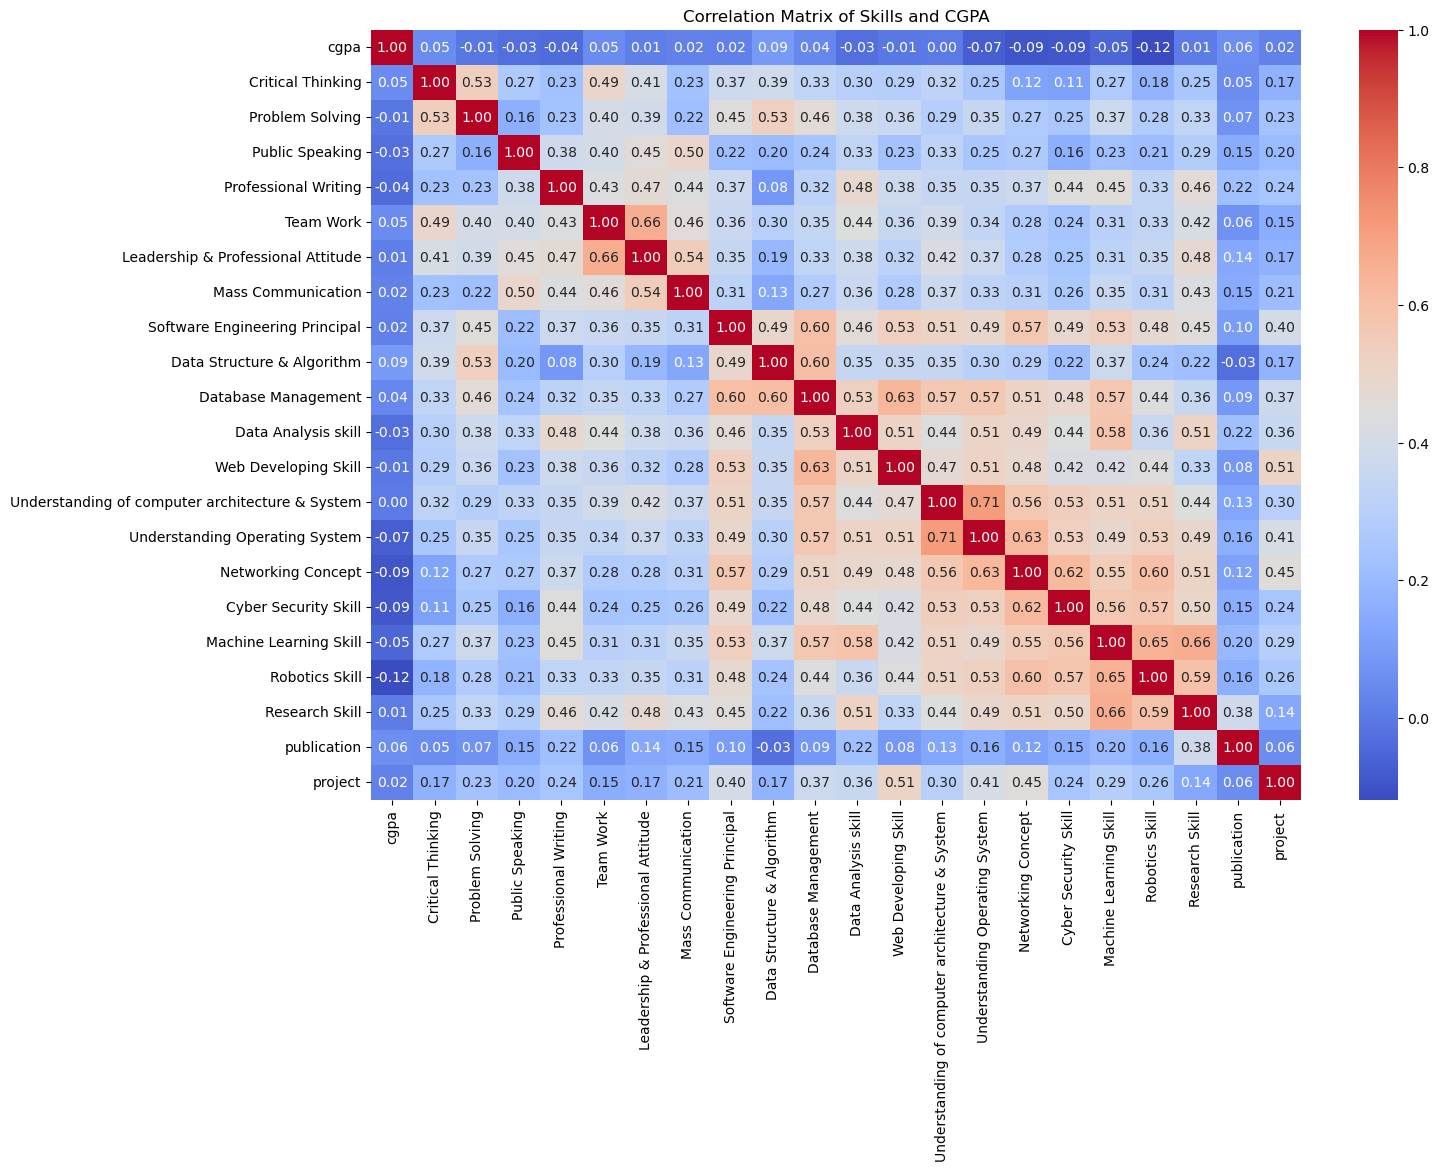

Skills most positively correlated with CGPA:
Data Structure & Algorithm    0.093840
publication                   0.057976
Team Work                     0.048603
Critical Thinking             0.047304
Database Management           0.037909
Name: cgpa, dtype: float64

Skills most negatively correlated with CGPA:
Machine Learning Skill           -0.050472
Understanding Operating System   -0.072387
Cyber Security Skill             -0.090408
Networking Concept               -0.093100
Robotics Skill                   -0.119050
Name: cgpa, dtype: float64


In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('rrr_data.csv')


skills = ['cgpa', 'Critical Thinking', 'Problem Solving', 'Public Speaking', 'Professional Writing', 'Team Work', 'Leadership & Professional Attitude', 'Mass Communication', 'Software Engineering Principal', 'Data Structure & Algorithm', 'Database Management', 'Data Analysis skill', 'Web Developing Skill', 'Understanding of computer architecture & System', 'Understanding Operating System', 'Networking Concept', 'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill', 'Research Skill', 'publication', 'project']


correlation_matrix = data[skills].corr()

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Skills and CGPA')
plt.show()

# Identify skills most correlated with CGPA
cgpa_correlations = correlation_matrix['cgpa'].drop('cgpa').sort_values(ascending=False)
print("Skills most positively correlated with CGPA:")
print(cgpa_correlations.head())
print("\nSkills most negatively correlated with CGPA:")
print(cgpa_correlations.tail())


In [114]:
# Display the correlation matrix DataFrame
correlation_matrix


,cgpa,Critical Thinking,Problem Solving,Public Speaking,Professional Writing,Team Work,Leadership & Professional Attitude,Mass Communication,Software Engineering Principal,Data Structure & Algorithm,...,Web Developing Skill,Understanding of computer architecture & System,Understanding Operating System,Networking Concept,Cyber Security Skill,Machine Learning Skill,Robotics Skill,Research Skill,publication,project
cgpa,1.000000,0.047304,-0.009746,-0.030824,-0.038320,0.048603,0.012599,0.023474,0.019047,0.093840,...,-0.005055,0.002899,-0.072387,-0.093100,-0.090408,-0.050472,-0.119050,0.006033,0.057976,0.024240
Critical Thinking,0.047304,1.000000,0.534286,0.265689,0.230293,0.494297,0.411553,0.229954,0.367803,0.385965,...,0.292830,0.323953,0.254333,0.122587,0.109917,0.273238,0.175915,0.249764,0.053224,0.171631
Problem Solving,-0.009746,0.534286,1.000000,0.164416,0.233578,0.401721,0.388117,0.219993,0.449076,0.529521,...,0.358810,0.293786,0.352033,0.270017,0.250883,0.372017,0.276362,0.328194,0.065291,0.230835
Public Speaking,-0.030824,0.265689,0.164416,1.000000,0.383401,0.399081,0.453938,0.495961,0.215290,0.204159,...,0.233340,0.325587,0.254182,0.269178,0.156754,0.225191,0.211927,0.286515,0.148431,0.203731
Professional Writing,-0.038320,0.230293,0.233578,0.383401,1.000000,0.427554,0.467479,0.435478,0.370317,0.084048,...,0.378124,0.349213,0.352209,0.374636,0.444775,0.451975,0.330043,0.458629,0.220982,0.244345
Team Work,0.048603,0.494297,0.401721,0.399081,0.427554,1.000000,0.660207,0.456544,0.360356,0.296547,...,0.356878,0.388264,0.338175,0.275379,0.243007,0.308081,0.332613,0.417068,0.064920,0.153376
Leadership & Professional Attitude,0.012599,0.411553,0.388117,0.453938,0.467479,0.660207,1.000000,0.539971,0.352157,0.194088,...,0.315846,0.420044,0.366272,0.278826,0.246891,0.313725,0.351105,0.475558,0.137940,0.173373
Mass Communication,0.023474,0.229954,0.219993,0.495961,0.435478,0.456544,0.539971,1.000000,0.314500,0.134008,...,0.277248,0.369015,0.326044,0.307356,0.258561,0.353628,0.310532,0.431194,0.145067,0.209041
Software Engineering Principal,0.019047,0.367803,0.449076,0.215290,0.370317,0.360356,0.352157,0.314500,1.000000,0.490571,...,0.529266,0.506553,0.492831,0.565685,0.488510,0.532261,0.478188,0.452199,0.101950,0.399861
Data Structure & Algorithm,0.093840,0.385965,0.529521,0.204159,0.084048,0.296547,0.194088,0.134008,0.490571,1.000000,...,0.349986,0.349114,0.303244,0.291089,0.220784,0.373992,0.237454,0.217735,-0.030318,0.173895


# Skill Clustering

In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('rrr_data.csv')


skills = ['cgpa', 'Critical Thinking', 'Problem Solving', 'Public Speaking', 'Professional Writing', 'Team Work', 'Leadership & Professional Attitude', 'Mass Communication', 'Software Engineering Principal', 'Data Structure & Algorithm', 'Database Management', 'Data Analysis skill', 'Web Developing Skill', 'Understanding of computer architecture & System', 'Understanding Operating System', 'Networking Concept', 'Cyber Security Skill', 'Machine Learning Skill', 'Robotics Skill', 'Research Skill', 'publication', 'project']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[skills])
#data_scaled

array([[ 1.08838864,  0.31691998,  0.38397082, ...,  1.06514477,
         0.63917782, -0.29782037],
       [-1.47560382, -1.14091194, -1.13391383, ..., -0.33113309,
        -0.41776328, -1.22234248],
       [ 0.13167503,  0.31691998,  0.38397082, ..., -0.33113309,
        -0.41776328, -0.29782037],
       ...,
       [-0.02139915,  0.31691998,  0.38397082, ..., -0.33113309,
        -0.41776328,  0.16444069],
       [ 0.39955484, -1.14091194, -1.13391383, ..., -0.33113309,
        -0.41776328, -0.29782037],
       [ 0.74397174,  0.31691998,  0.38397082, ..., -1.72741095,
         0.63917782,  1.08896281]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

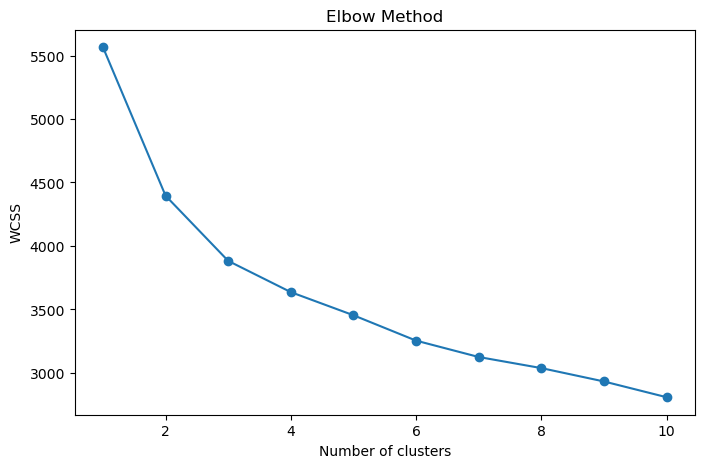

In [117]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
# Fit the K-means algorithm with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asfak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# Calculate the mean skill ratings for each cluster
cluster_profiles = data.groupby('Cluster')[skills].mean()

print("Cluster Profiles:")
cluster_profiles


Cluster Profiles:


,cgpa,Critical Thinking,Problem Solving,Public Speaking,Professional Writing,Team Work,Leadership & Professional Attitude,Mass Communication,Software Engineering Principal,Data Structure & Algorithm,...,Web Developing Skill,Understanding of computer architecture & System,Understanding Operating System,Networking Concept,Cyber Security Skill,Machine Learning Skill,Robotics Skill,Research Skill,publication,project
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3.234889,2.266667,2.200000,1.977778,2.177778,2.666667,2.377778,2.200000,2.200000,2.177778,...,2.400000,2.266667,2.377778,2.177778,1.933333,2.088889,1.911111,2.000000,0.644444,4.577778
1,3.257419,1.244898,1.142857,1.020408,1.040816,1.387755,1.122449,1.040816,0.775510,1.142857,...,0.795918,0.755102,0.714286,0.714286,0.734694,0.673469,0.591837,0.571429,0.102041,1.714286
2,3.285698,1.811321,1.805031,1.672956,1.421384,1.987421,1.886792,1.660377,1.490566,1.767296,...,1.427673,1.389937,1.402516,1.383648,1.188679,1.163522,1.025157,1.226415,0.415094,2.383648


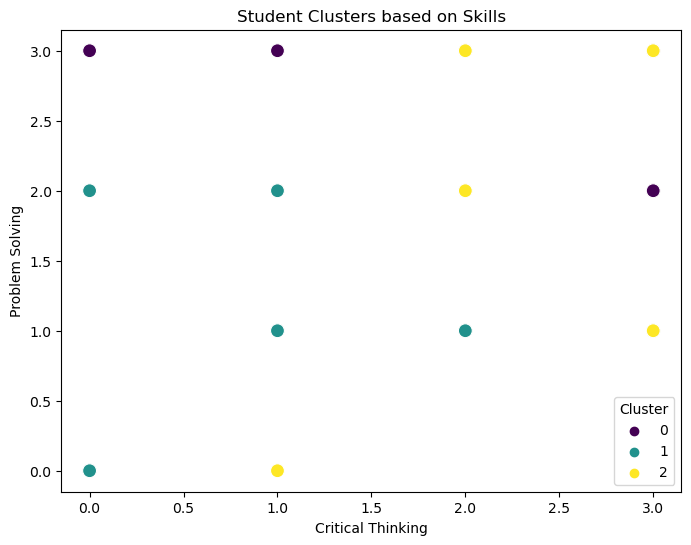

In [15]:
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Critical Thinking', y='Problem Solving', hue='Cluster', palette='viridis', s=100)
plt.title('Student Clusters based on Skills')
plt.xlabel('Critical Thinking')
plt.ylabel('Problem Solving')
plt.show()


# Influencing Factors Analysis


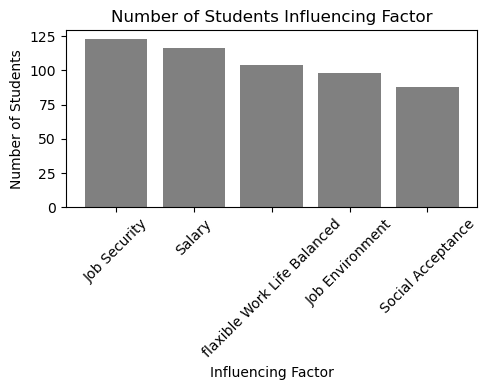

In [176]:
import pandas as pd
import matplotlib.pyplot as plt


csv1 = pd.read_csv("rrr_data.csv", usecols=["Influencing Factor"])
data = pd.DataFrame(csv1)
data["Influencing Factor"].fillna("", inplace=True)
jobs = ['Social Acceptance', 'Job Security', 'Job Environment', 'Salary', 'flaxible Work Life Balanced']


def is_job_preferred(preferred_jobs, job):
    return job in preferred_jobs


for job in jobs:
    data[job] = data['Influencing Factor'].apply(lambda x: is_job_preferred(x, job))


job_sum = {}
for job in jobs:
    job_sum[job] = data[job].sum()

job_counts = pd.DataFrame(list(job_sum.items()), columns=['Job', 'Count'])


job_counts = job_counts.sort_values(by='Count', ascending=False)

#print(job_counts)



# Plotting the bar plot
plt.figure(figsize=(5, 4))
plt.bar(job_counts['Job'], job_counts['Count'], color='gray')
plt.xlabel('Influencing Factor')
plt.ylabel('Number of Students')
plt.title('Number of Students Influencing Factor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Influencing Factors based on- prefered job

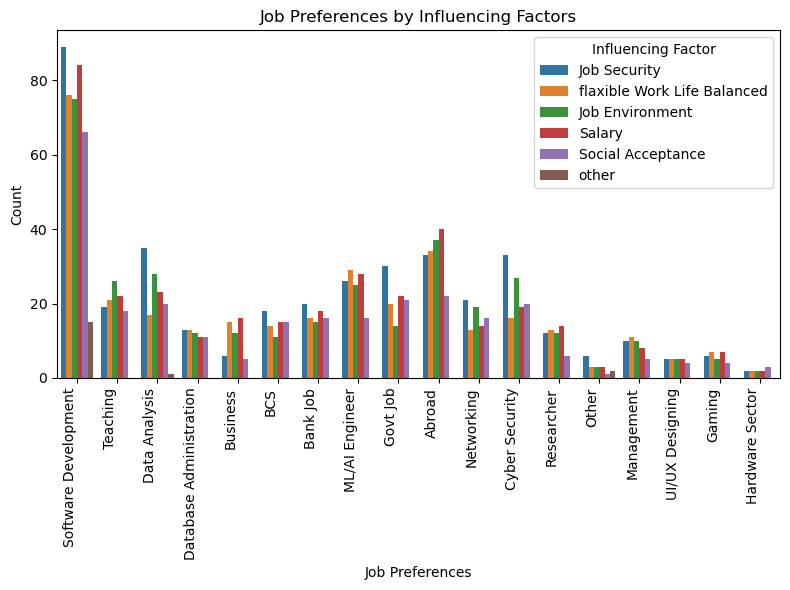

In [155]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'rrr_data.csv'  # Change this to your file path

# Read the relevant columns and split the comma-separated values into lists
data = pd.read_csv(file_path, usecols=["Influencing Factor", "Prefer Job"])
data['Influencing Factor'] = data['Influencing Factor'].astype(str).str.split(',')
data['Prefer Job'] = data['Prefer Job'].astype(str).str.split(',')

# Flatten the data to have one row per (influencing factor, job preference)
rows = []
for index, row in data.iterrows():
    for factor in row['Influencing Factor']:
        for job in row['Prefer Job']:
            rows.append((factor.strip(), job.strip()))

# Create a new DataFrame from the flattened data
flat_data = pd.DataFrame(rows, columns=["Influencing Factor", "Prefer Job"])

# Plot the data
plt.figure(figsize=(8, 6))
sns.countplot(data=flat_data, x='Prefer Job', hue='Influencing Factor')
plt.title('Job Preferences by Influencing Factors')
plt.xlabel('Job Preferences')
plt.ylabel('Count')
plt.legend(title='Influencing Factor')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [175]:
import pandas as pd
from collections import Counter

# Define the function to get job preferences based on influencing factor indices
def fun(indices, factor, data1):
    v = []
    for index in indices:
        v.extend(data1.at[index, 'Prefer Job'])
    counts = Counter(v)
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_counts, columns=['Preferred Job', factor])

# Read the CSV file and select the necessary columns
data = pd.read_csv("rrr_data.csv", usecols=["Influencing Factor", "Prefer Job"])
data['Influencing Factor'] = data['Influencing Factor'].astype(str).str.split(',')
data['Prefer Job'] = data['Prefer Job'].astype(str).str.split(',')

# Initialize dictionary to store indices for different factors
indices = {
    'Salary': [],
    'Job Environment': [],
    'flaxible Work Life Balanced': [],
    'Job Security': [],
    'Social Acceptance': [],
    'other': []
}

# Populate the lists based on the influencing factors
for index, row in data.iterrows():
    for factor in row['Influencing Factor']:
        factor = factor.strip()
        if factor in indices:
            indices[factor].append(index)

# Create DataFrames for each influencing factor and merge them
merged_df = pd.DataFrame({'Preferred Job': []})
for factor, idx_list in indices.items():
    df = fun(idx_list, factor, data)
    if merged_df.empty:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='Preferred Job', how='outer')

# Fill NaN values with 0 (if needed)
merged_df = merged_df.fillna(0)
merged_df['other'] = merged_df['other'].astype('int16')
# Display the merged DataFrame
merged_df


,Preferred Job,Salary,Job Environment,flaxible Work Life Balanced,Job Security,Social Acceptance,other
0,Software Development,84,75,76,89,66,15
1,Abroad,40,37,34,33,22,0
2,ML/AI Engineer,28,25,29,26,16,0
3,Data Analysis,23,28,17,35,20,1
4,Teaching,22,26,21,19,18,0
5,Govt Job,22,14,20,30,21,0
6,Cyber Security,19,27,16,33,20,0
7,Bank Job,18,15,16,20,16,0
8,Business,16,12,15,6,5,0
9,BCS,15,11,14,18,15,0


# Factor analysis

In [27]:
import pandas as pd

# Load the data
csv1 = pd.read_csv("C://jupyter_work//encoded_data.csv")
df = pd.DataFrame(csv1)



columns_to_drop = ['Unnamed: 0', 'gender','university_name','year']  
df = df.drop(columns_to_drop, axis=1)



scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

df

,cgpa,Critical Thinking,Problem Solving,Public Speaking,Professional Writing,Team Work,Leadership & Professional Attitude,Mass Communication,Software Engineering Principal,Data Structure & Algorithm,...,Hardware Sector,ML/AI Engineer,Management,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing,other.1
0,3.84,2,2,1,1,3,2,2,2,3,...,0,0,0,0,0,0,1,0,0,0
1,2.50,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,3.34,2,2,2,1,2,2,1,1,2,...,0,0,0,0,0,0,1,0,0,0
3,3.78,2,2,1,2,2,2,2,1,2,...,0,0,0,0,0,0,1,0,0,0
4,3.00,2,2,2,3,3,2,2,2,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,3.62,2,1,1,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
249,2.93,1,2,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
250,3.26,2,2,1,2,2,2,1,2,2,...,0,0,0,0,0,0,1,1,0,0
251,3.48,1,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
Analytical Skills:
    
Critical Thinking
Problem Solving
Data Analysis skill
Research Skill


Communication Skill:
    
Public Speaking
Professional Writing
Team Work
Leadership & Professional Attitude
Mass Communication


Technical Skill:
    
cgpa
Software Engineering Principal
Data Structure & Algorithm
Database Management
Web Developing Skill
Machine Learning Skill
Robotics Skill
Cyber Security Skill
publication
project


Systems Knowledge:
    
Understanding of computer architecture & System
Understanding Operating System
Networking Concept

SyntaxError: invalid syntax (2193265678.py, line 1)

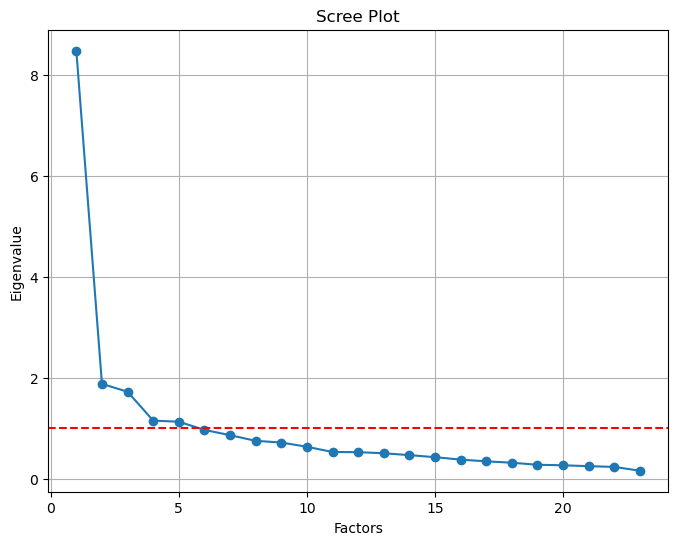

Factor Loadings:
                                                  Factor 1  Factor 2  Factor 3  \
Unnamed: 0                                      -0.054379  0.055448  0.102209   
cgpa                                            -0.136777  0.008713  0.115518   
Critical Thinking                                0.025289  0.378567  0.575463   
Problem Solving                                  0.174746  0.212964  0.657719   
Public Speaking                                  0.119503  0.558869  0.068214   
Professional Writing                             0.258019  0.465092  0.034181   
Team Work                                        0.150520  0.676803  0.351549   
Leadership & Professional Attitude               0.170830  0.767419  0.224580   
Mass Communication                               0.196966  0.608905  0.047120   
Software Engineering Principal                   0.504253  0.172506  0.436745   
Data Structure & Algorithm                       0.268821  0.034254  0.714860   
Database M

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Unnamed: 0,-0.054379,0.055448,0.102209,0.064333,0.121578
cgpa,-0.136777,0.008713,0.115518,0.012637,0.054772
Critical Thinking,0.025289,0.378567,0.575463,0.034133,0.069041
Problem Solving,0.174746,0.212964,0.657719,0.108234,0.095276
Public Speaking,0.119503,0.558869,0.068214,0.097792,0.160478
Professional Writing,0.258019,0.465092,0.034181,0.379403,0.242350
Team Work,0.150520,0.676803,0.351549,0.096937,0.023583
Leadership & Professional Attitude,0.170830,0.767419,0.224580,0.139377,0.004898
Mass Communication,0.196966,0.608905,0.047120,0.208571,0.127399
Software Engineering Principal,0.504253,0.172506,0.436745,0.157361,0.264414


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('skills.csv')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform initial factor analysis
fa = FactorAnalyzer(n_factors=20, rotation=None)
fa.fit(scaled_data)

# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

# Based on the scree plot, decide on the number of factors (e.g., 5)
n_factors = 5

# Perform EFA with Varimax rotation
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(scaled_data)

# Get factor loadings
loadings = fa.loadings_

# Create a DataFrame for the factor loadings
loadings_df = pd.DataFrame(loadings, index=data.columns, columns=[f'Factor {i+1}' for i in range(loadings.shape[1])])
print("Factor Loadings:\n", loadings_df)

# Interpretation of factors with naming
print("\nInterpretation of Factors and Naming:")
factor_names = ["Analytical Skills", "Communication & Leadership Skills", "Technical Skills", "Systems & Research Skills", "Advanced Technical Skills"]
for i in range(n_factors):
    factor_skills = loadings_df.iloc[:, i].nlargest(5).index.tolist()
    factor_description = f"Factor {i+1} ({factor_names[i]}) is associated with: {', '.join(factor_skills)}"
    print(factor_description)

# Optional: Calculate Cronbach's alpha for each factor
def calculate_cronbach_alpha(itemscores):
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return nitems / (nitems - 1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

print("\nCronbach's Alpha for each factor:")
for i in range(n_factors):
    factor_items = data.loc[:, loadings_df.iloc[:, i].nlargest(5).index]
    alpha = calculate_cronbach_alpha(factor_items)
    print(f"Cronbach's Alpha for Factor {i+1} ({factor_names[i]}): {alpha:.2f}")

# Display the factor loadings DataFrame
loadings_df
